In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
pd.set_option('display.max_columns', None)

In [38]:
anime_df = pd.read_csv('data/anime.csv')
rating_df = pd.read_csv('data/rating.csv')
anime_meta = pd.read_csv('data/AnimeList_meta.csv')
users_meta = pd.read_csv('data/UserList_Meta.csv')

In [3]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
print(anime_df.nunique())
anime_df.info()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
anime_meta['anime_id'].nunique()

14478

In [7]:
anime_meta.isnull().sum()

anime_id              0
title                 0
title_english      8754
title_japanese       35
title_synonyms     5541
image_url            96
type                  0
source                0
episodes              0
status                0
airing                0
aired_string          0
aired                 0
duration              0
rating                0
score                 0
scored_by             0
rank               1574
popularity            0
members               0
favorites             0
background        13421
premiered         10382
broadcast         10207
related               0
producer           6190
licensor          11105
studio             5934
genre                64
opening_theme         0
ending_theme          0
dtype: int64

In [8]:
anime_meta[anime_meta['type']=='Movie']['duration']

55              Unknown
77        1 hr. 36 min.
78              25 min.
81              49 min.
86               8 min.
              ...      
14440      1 hr. 5 min.
14443    4 min. per ep.
14446           19 min.
14465           20 min.
14475           Unknown
Name: duration, Length: 2624, dtype: object

In [9]:
rating_df['user_id'].nunique()

73515

In [10]:
rating_df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [11]:
users_meta['user_id'].nunique()

302673

In [12]:
rating_df['anime_id'].nunique()

11200

In [13]:
rating_df.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [14]:
users_meta.isnull().sum()

username                         1
user_id                          0
user_watching                    0
user_completed                   0
user_onhold                      0
user_dropped                     0
user_plantowatch                 0
user_days_spent_watching         0
gender                       84875
location                    145901
birth_date                  133926
access_rank                 302675
join_date                      129
last_online                    129
stats_mean_score               129
stats_rewatched                129
stats_episodes                 129
dtype: int64

## Merge the dataframes into one dataframe

In [15]:
rating_df = rating_df[rating_df['rating']!=-1]
#remove the -1's, which are no values for the ratings

count_ratings = rating_df.groupby('anime_id').count().rename(columns={'rating': 'num_ratings'})['num_ratings']
count_ratings

anime_id
1        13449
5         5790
6         9385
7         2169
8          308
         ...  
34324       11
34325       15
34349        3
34367        4
34475        3
Name: num_ratings, Length: 9927, dtype: int64

In [16]:
anime_full = anime_df.merge(right=anime_meta, how='left', on='anime_id')
anime_full = anime_full.merge(right=count_ratings, how='left', on='anime_id')
anime_full

,anime_id,name,genre_x,type_x,episodes_x,rating_x,members_x,title,title_english,title_japanese,title_synonyms,image_url,type_y,source,episodes_y,status,airing,aired_string,aired,duration,rating_y,score,scored_by,rank,popularity,members_y,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre_y,opening_theme,ending_theme,num_ratings
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Kimi no Na wa.,Your Name.,君の名は。,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,1.0,Finished Airing,False,"Aug 26, 2016","{'from': '2016-08-26', 'to': '2016-08-26'}",1 hr. 46 min.,PG-13 - Teens 13 or older,9.19,471398.0,2.0,33.0,730076.0,34912.0,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 99314, 'type': 'man...","Kadokawa Shoten, Toho, Sound Team Don Juan, La...","Funimation, NYAV Post",CoMix Wave Films,"Supernatural, Drama, Romance, School","['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,64.0,Finished Airing,False,"Apr 5, 2009 to Jul 4, 2010","{'from': '2009-04-05', 'to': '2010-07-04'}",24 min. per ep.,R - 17+ (violence & profanity),9.25,733592.0,1.0,4.0,1199091.0,106895.0,Fullmetal Alchemist: Brotherhood is an alterna...,Spring 2009,Sundays at 17:00 (JST),"{'Adaptation': [{'mal_id': 25, 'type': 'manga'...","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",21494.0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Gintama°,Gintama Season 4,銀魂°,Gintama&#039; (2015),https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51.0,Finished Airing,False,"Apr 8, 2015 to Mar 30, 2016","{'from': '2015-04-08', 'to': '2016-03-30'}",24 min. per ep.,R - 17+ (violence & profanity),9.15,71751.0,3.0,383.0,198744.0,5668.0,This is a fourth season of Gintama. In the ep...,Spring 2015,Wednesdays at 18:00 (JST),"{'Adaptation': [{'mal_id': 44, 'type': 'manga'...","TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S...",1188.0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Steins;Gate,Steins;Gate,STEINS;GATE,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,24.0,Finished Airing,False,"Apr 6, 2011 to Sep 14, 2011","{'from': '2011-04-06', 'to': '2011-09-14'}",24 min. per ep.,PG-13 - Teens 13 or older,9.14,563857.0,5.0,8.0,1010330.0,92423.0,Steins;Gate is based on 5pb. and Nitroplus&#03...,Spring 2011,Wednesdays at 02:05 (JST),"{'Adaptation': [{'mal_id': 17517, 'type': 'man...","Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,"Thriller, Sci-Fi","['""Hacking to the Gate"" by Kanako Itou']","['#1: ""Toki Tsukasadoru Juuni no Meiyaku (刻司ル十...",17151.0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Gintama&#039;,Gintama Season 2,銀魂&#039;,Gintama (2011),https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51.0,Finished Airing,False,"Apr 4, 2011 to Mar 26, 2012","{'from': '2011-04-04', 'to': '2012-03-26'}",24 min. per ep.,PG-13 - Teens 13 or older,9.11,92025.0,7.0,342.0,215527.0,4549.0,This is the second season of Gintama. In the e...,Spring 2011,Mondays at 18:00 (JST),"{'Adaptation': [{'mal_id': 44, 'type': 'manga'...","TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",NaN,Sunrise,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...","['#1: ""T

In [17]:
anime_full['type_x'].unique()
#only care about Movie & TV, what is OVA & ONA?

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [18]:
anime_full['rating_y'].unique()

array(['PG-13 - Teens 13 or older', 'R - 17+ (violence & profanity)',
       'PG - Children', 'G - All Ages', 'R+ - Mild Nudity', 'None', nan,
       'Rx - Hentai'], dtype=object)

In [19]:
producers = anime_full['producer'].nunique()
licensers = anime_full['licensor'].nunique()
studio = anime_full['studio'].nunique()
print(f'Producers: {producers}, Licensors: {licensers}, studio: {studio}')

Producers: 3004, Licensors: 190, studio: 694


In [20]:
anime_full['licensor'].unique()[0]
#Licensors are lists of multiple licensors, may be worth while to blow up

'Funimation, NYAV Post'

In [21]:
anime_full['producer'].unique()[0]
#Same for producers, may need to blow up

'Kadokawa Shoten, Toho, Sound Team Don Juan, Lawson HMV Entertainment, Amuse, East Japan Marketing &amp; Communications'

In [22]:
anime_full['studio'].unique()[0]
#Only one studio per anime, can visualize ratings per studio

'CoMix Wave Films'

In [23]:
anime_full['background']
#Most background cells are empty. Bummer. Cannot use NLP to analyze.

0                                                      NaN
1        Fullmetal Alchemist: Brotherhood is an alterna...
2         This is a fourth season of Gintama. In the ep...
3        Steins;Gate is based on 5pb. and Nitroplus&#03...
4        This is the second season of Gintama. In the e...
                               ...                        
12289                                                  NaN
12290                                                  NaN
12291                                                  NaN
12292                                                  NaN
12293                                                  NaN
Name: background, Length: 12294, dtype: object

In [24]:
anime_full['image_url'][0]

'https://myanimelist.cdn-dena.com/images/anime/5/87048.jpg'

In [25]:
anime_full[['name','title','title_japanese','title_english','title_synonyms']].isnull().sum()
#drop the unneccessary additional titles

name                 0
title               17
title_japanese      40
title_english     7217
title_synonyms    4537
dtype: int64

In [26]:
(anime_full.isnull().sum()/len(anime_full)).sort_values(ascending=False)

background        0.924597
licensor          0.736213
premiered         0.698878
broadcast         0.691069
title_english     0.587034
producer          0.390678
studio            0.375874
title_synonyms    0.369042
num_ratings       0.192614
rank              0.099723
rating_x          0.018708
image_url         0.007077
genre_x           0.005043
genre_y           0.004799
title_japanese    0.003254
type_x            0.002034
status            0.001383
title             0.001383
type_y            0.001383
source            0.001383
episodes_y        0.001383
aired             0.001383
airing            0.001383
aired_string      0.001383
ending_theme      0.001383
duration          0.001383
rating_y          0.001383
score             0.001383
scored_by         0.001383
popularity        0.001383
members_y         0.001383
favorites         0.001383
related           0.001383
opening_theme     0.001383
members_x         0.000000
episodes_x        0.000000
name              0.000000
a

In [27]:
anime_full[['type_x','type_y']].isnull().sum() #keep y
anime_full[['episodes_x','episodes_y']].isnull().sum() #keep x
anime_full[['status','airing']].isnull().sum() #Drop airing, contains redundant info
anime_full[['rating_x', 'members_x','score','scored_by', 'members_y']] #drop all score columns from meta_df
anime_full[['genre_x','genre_y']].isnull().sum() #drop genre_x
anime_full[['opening_theme','ending_theme']].iloc[1,:] # could we do some sort of NLP on the opening/ending themes?

opening_theme    ['#1: "again" by YUI (eps 1-14)', '#2: "Hologr...
ending_theme     ['#1: "Uso (嘘)" by SID (eps 1-14)', '#2: "LET ...
Name: 1, dtype: object

In [28]:
anime_full['related'][0]
#not sure what this is, delete.

"{'Adaptation': [{'mal_id': 99314, 'type': 'manga', 'url': 'https://myanimelist.net/manga/99314/Kimi_no_Na_wa', 'title': 'Kimi no Na wa.'}, {'mal_id': 111747, 'type': 'manga', 'url': 'https://myanimelist.net/manga/111747/Kimi_no_Na_wa', 'title': 'Kimi no Na wa.'}], 'Other': [{'mal_id': 33902, 'type': 'anime', 'url': 'https://myanimelist.net/anime/33902/Suntory_Minami_Alps_no_Tennen_Mizu', 'title': 'Suntory Minami Alps no Tennen Mizu'}]}"

In [29]:
anime_full[['aired_string','aired']]

,aired_string,aired
0,"Aug 26, 2016","{'from': '2016-08-26', 'to': '2016-08-26'}"
1,"Apr 5, 2009 to Jul 4, 2010","{'from': '2009-04-05', 'to': '2010-07-04'}"
2,"Apr 8, 2015 to Mar 30, 2016","{'from': '2015-04-08', 'to': '2016-03-30'}"
3,"Apr 6, 2011 to Sep 14, 2011","{'from': '2011-04-06', 'to': '2011-09-14'}"
4,"Apr 4, 2011 to Mar 26, 2012","{'from': '2011-04-04', 'to': '2012-03-26'}"
...,...,...
12289,"Oct 26, 2001","{'from': '2001-10-26', 'to': '2001-10-26'}"
12290,"Nov 18, 2000","{'from': '2000-11-18', 'to': '2000-11-18'}"
12291,"Dec 5, 1989 to Jun 5, 1990","{'from': '1989-12-05', 'to': '1990-06-05'}"
12292,"Mar 8, 1991","{'from': '1991-03-08', 'to': '1991-03-08'}"


## Final Cleaning of anime_df

In [30]:
anime_full = anime_full.drop(columns=['title','title_japanese','title_english','title_synonyms', 'type_x',
                                      'episodes_y', 'airing', 'score','scored_by', 'members_y', 'background',
                                     'licensor', 'premiered', 'broadcast', 'related', 'genre_x', 'aired_string'])
anime_full

,anime_id,name,episodes_x,rating_x,members_x,image_url,type_y,source,status,aired,duration,rating_y,rank,popularity,favorites,producer,studio,genre_y,opening_theme,ending_theme,num_ratings
0,32281,Kimi no Na wa.,1,9.37,200630,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,"{'from': '2016-08-26', 'to': '2016-08-26'}",1 hr. 46 min.,PG-13 - Teens 13 or older,2.0,33.0,34912.0,"Kadokawa Shoten, Toho, Sound Team Don Juan, La...",CoMix Wave Films,"Supernatural, Drama, Romance, School","['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2009-04-05', 'to': '2010-07-04'}",24 min. per ep.,R - 17+ (violence & profanity),1.0,4.0,106895.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",21494.0
2,28977,Gintama°,51,9.25,114262,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2015-04-08', 'to': '2016-03-30'}",24 min. per ep.,R - 17+ (violence & profanity),3.0,383.0,5668.0,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S...",1188.0
3,9253,Steins;Gate,24,9.17,673572,https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,Finished Airing,"{'from': '2011-04-06', 'to': '2011-09-14'}",24 min. per ep.,PG-13 - Teens 13 or older,5.0,8.0,92423.0,"Frontier Works, Media Factory, Movic, AT-X, Ka...",White Fox,"Thriller, Sci-Fi","['""Hacking to the Gate"" by Kanako Itou']","['#1: ""Toki Tsukasadoru Juuni no Meiyaku (刻司ル十...",17151.0
4,9969,Gintama&#039;,51,9.16,151266,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2011-04-04', 'to': '2012-03-26'}",24 min. per ep.,PG-13 - Teens 13 or older,7.0,342.0,4549.0,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...","['#1: ""Tougenkyou Alien (桃源郷エイリアン)"" by serial ...","['#1: ""Samurai Heart (Some Like It Hot!!)"" by ...",3115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,1,4.15,211,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2001-10-26', 'to': '2001-10-26'}",30 min.,Rx - Hentai,NaN,10297.0,0.0,NaN,NaN,Hentai,[],[],2.0
12290,5543,Under World,1,4.28,183,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2000-11-18', 'to': '2000-11-18'}",1 hr. 4 min.,Rx - Hentai,NaN,10456.0,0.0,NaN,NaN,Hentai,[],[],2.0
12291,5621,Violence Gekiga David no Hoshi,4,4.88,219,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1989-12-05', 'to': '1990-06-05'}",45 min. per ep.,Rx - Hentai,NaN,10164.0,2.0,NaN,NaN,Hentai,[],[],1.0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,1,4.98,175,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1991-03-08', 'to': '1991-03-08'}",45 min.,Rx - Hentai,NaN,10510.0,0.0,NaN,NaN,Hentai,[],[],1.0


In [31]:
anime_full = anime_full.rename(columns={'rating_x': 'avg_rating','rating_y': 'rating_type', 'genre_y':'genre', 
                                        'members_x': 'members', 'episodes_x':'episodes', 'type_y':'type'})
anime_full

,anime_id,name,episodes,avg_rating,members,image_url,type,source,status,aired,duration,rating_type,rank,popularity,favorites,producer,studio,genre,opening_theme,ending_theme,num_ratings
0,32281,Kimi no Na wa.,1,9.37,200630,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,"{'from': '2016-08-26', 'to': '2016-08-26'}",1 hr. 46 min.,PG-13 - Teens 13 or older,2.0,33.0,34912.0,"Kadokawa Shoten, Toho, Sound Team Don Juan, La...",CoMix Wave Films,"Supernatural, Drama, Romance, School","['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2009-04-05', 'to': '2010-07-04'}",24 min. per ep.,R - 17+ (violence & profanity),1.0,4.0,106895.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",21494.0
2,28977,Gintama°,51,9.25,114262,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2015-04-08', 'to': '2016-03-30'}",24 min. per ep.,R - 17+ (violence & profanity),3.0,383.0,5668.0,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S...",1188.0
3,9253,Steins;Gate,24,9.17,673572,https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,Finished Airing,"{'from': '2011-04-06', 'to': '2011-09-14'}",24 min. per ep.,PG-13 - Teens 13 or older,5.0,8.0,92423.0,"Frontier Works, Media Factory, Movic, AT-X, Ka...",White Fox,"Thriller, Sci-Fi","['""Hacking to the Gate"" by Kanako Itou']","['#1: ""Toki Tsukasadoru Juuni no Meiyaku (刻司ル十...",17151.0
4,9969,Gintama&#039;,51,9.16,151266,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2011-04-04', 'to': '2012-03-26'}",24 min. per ep.,PG-13 - Teens 13 or older,7.0,342.0,4549.0,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...","['#1: ""Tougenkyou Alien (桃源郷エイリアン)"" by serial ...","['#1: ""Samurai Heart (Some Like It Hot!!)"" by ...",3115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,1,4.15,211,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2001-10-26', 'to': '2001-10-26'}",30 min.,Rx - Hentai,NaN,10297.0,0.0,NaN,NaN,Hentai,[],[],2.0
12290,5543,Under World,1,4.28,183,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2000-11-18', 'to': '2000-11-18'}",1 hr. 4 min.,Rx - Hentai,NaN,10456.0,0.0,NaN,NaN,Hentai,[],[],2.0
12291,5621,Violence Gekiga David no Hoshi,4,4.88,219,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1989-12-05', 'to': '1990-06-05'}",45 min. per ep.,Rx - Hentai,NaN,10164.0,2.0,NaN,NaN,Hentai,[],[],1.0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,1,4.98,175,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1991-03-08', 'to': '1991-03-08'}",45 min.,Rx - Hentai,NaN,10510.0,0.0,NaN,NaN,Hentai,[],[],1.0


In [32]:
anime_full[anime_full['num_ratings'].isnull()]

,anime_id,name,episodes,avg_rating,members,image_url,type,source,status,aired,duration,rating_type,rank,popularity,favorites,producer,studio,genre,opening_theme,ending_theme,num_ratings
31,32983,Natsume Yuujinchou Go,13,8.76,38865,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2016-10-05', 'to': '2016-12-21'}",23 min. per ep.,PG-13 - Teens 13 or older,63.0,1038.0,459.0,"TV Tokyo, Aniplex, Nihon Ad Systems, Hakusensha",Shuka,"Slice of Life, Supernatural, Drama, Fantasy, S...","['""Takarabako (タカラバコ)"" by Sasanomaly (ササノマリイ)']","['""Akane Sasu (茜さす)"" by Aimer']",NaN
62,32995,Yuri!!! on Ice,12,8.61,103178,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,Finished Airing,"{'from': '2016-10-06', 'to': '2016-12-22'}",23 min. per ep.,PG-13 - Teens 13 or older,339.0,238.0,11140.0,"Dentsu, TV Asahi, Movic, Avex Pictures, CIC, C...",MAPPA,"Comedy, Sports","['""History Maker"" by Dean Fujioka']","['""You Only Live Once"" by YURI!!! on ICE feat....",NaN
74,21,One Piece,Unknown,8.58,504862,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Currently Airing,"{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,91.0,35.0,69760.0,"Fuji TV, TAP, Shueisha",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",NaN
76,31933,JoJo no Kimyou na Bouken: Diamond wa Kudakenai,39,8.57,74074,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2016-04-02', 'to': '2016-12-24'}",23 min. per ep.,R - 17+ (violence & profanity),64.0,432.0,7188.0,"Warner Bros., KlockWorx, Medicos Entertainment...",David Production,"Action, Adventure, Comedy, Supernatural, Drama...","['#1: ""Crazy Noisy Bizarre Town"" by THE DU (ep...","['#1: ""I WANT YOU"" by Savage Garden (eps 2-7, ...",NaN
140,10937,Mobile Suit Gundam: The Origin,6,8.42,15420,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Manga,Finished Airing,"{'from': '2015-04-24', 'to': '2018-05-05'}",1 hr. 3 min. per ep.,R+ - Mild Nudity,128.0,2189.0,240.0,NaN,Sunrise,"Action, Military, Sci-Fi, Space, Mecha, Shounen",[],"['#1: ""Hoshikuzu no Sunadokei (星屑の砂時計)"" by Tak...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12282,34388,Shikkoku no Shaga The Animation,Unknown,NaN,195,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,Currently Airing,"{'from': '2017-02-24', 'to': None}",30 min.,Rx - Hentai,NaN,5491.0,37.0,Pink Pineapple,Seven,Hentai,[],"['""Treasures"" by Naoka Wada']",NaN
12283,29992,Silent Chaser Kagami,1,4.95,112,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2000-08-21', 'to': '2000-08-21'}",30 min.,Rx - Hentai,NaN,10978.0,0.0,NaN,NaN,Hentai,[],[],NaN
12284,26031,Super Erotic Anime,2,4.45,118,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1985-10-09', 'to': '1985-10-17'}",27 min. per ep.,Rx - Hentai,NaN,11020.0,1.0,NaN,NaN,Hentai,[],[],NaN
12285,34399,Taimanin Asagi 3,Unknown,NaN,485,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Visual novel,Currently Airing,"{'from': '2016-12-23', 'to': None}",30 min.,Rx - Hentai,NaN,6438.0,15.0,ZIZ Entertainment (ZIZ),Studio Eromatick,"Demons, Hentai, Supernatural",[],"['""Catharsis no Yume (カタルシスの夢)"" by Maiko']",NaN


In [33]:
def weighted_rating(x):
    m = x['members'].quantile(0.80)
    C = x['avg_rating'].mean()
    v = x['members']
    R = x['avg_rating']
    # Compute the weighted score
    return (v/(v+m) * R) + (m/(m+v) * C)

In [34]:
anime_full = pd.concat([anime_full, weighted_rating(anime_full)], axis=1)
anime_full = anime_full.rename(columns={0: 'weighted_rating'})
anime_full

,anime_id,name,episodes,avg_rating,members,image_url,type,source,status,aired,duration,rating_type,rank,popularity,favorites,producer,studio,genre,opening_theme,ending_theme,num_ratings,weighted_rating
0,32281,Kimi no Na wa.,1,9.37,200630,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,"{'from': '2016-08-26', 'to': '2016-08-26'}",1 hr. 46 min.,PG-13 - Teens 13 or older,2.0,33.0,34912.0,"Kadokawa Shoten, Toho, Sound Team Don Juan, La...",CoMix Wave Films,"Supernatural, Drama, Romance, School","['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0,9.169377
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2009-04-05', 'to': '2010-07-04'}",24 min. per ep.,R - 17+ (violence & profanity),1.0,4.0,106895.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",21494.0,9.208548
2,28977,Gintama°,51,9.25,114262,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2015-04-08', 'to': '2016-03-30'}",24 min. per ep.,R - 17+ (violence & profanity),3.0,383.0,5668.0,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S...",1188.0,8.929129
3,9253,Steins;Gate,24,9.17,673572,https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,Finished Airing,"{'from': '2011-04-06', 'to': '2011-09-14'}",24 min. per ep.,PG-13 - Teens 13 or older,5.0,8.0,92423.0,"Frontier Works, Media Factory, Movic, AT-X, Ka...",White Fox,"Thriller, Sci-Fi","['""Hacking to the Gate"" by Kanako Itou']","['#1: ""Toki Tsukasadoru Juuni no Meiyaku (刻司ル十...",17151.0,9.111525
4,9969,Gintama&#039;,51,9.16,151266,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2011-04-04', 'to': '2012-03-26'}",24 min. per ep.,PG-13 - Teens 13 or older,7.0,342.0,4549.0,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...","['#1: ""Tougenkyou Alien (桃源郷エイリアン)"" by serial ...","['#1: ""Samurai Heart (Some Like It Hot!!)"" by ...",3115.0,8.918657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,1,4.15,211,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2001-10-26', 'to': '2001-10-26'}",30 min.,Rx - Hentai,NaN,10297.0,0.0,NaN,NaN,Hentai,[],[],2.0,6.441523
12290,5543,Under World,1,4.28,183,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2000-11-18', 'to': '2000-11-18'}",1 hr. 4 min.,Rx - Hentai,NaN,10456.0,0.0,NaN,NaN,Hentai,[],[],2.0,6.447341
12291,5621,Violence Gekiga David no Hoshi,4,4.88,219,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1989-12-05', 'to': '1990-06-05'}",45 min. per ep.,Rx - Hentai,NaN,10164.0,2.0,NaN,NaN,Hentai,[],[],1.0,6.450864
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,1,4.98,175,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1991-03-08', 'to': '1991-03-08'}",45 min.,Rx - Hentai,NaN,10510.0,0.0,NaN,NaN,Hentai,[],[],1.0,6.456597


## Import the clean anime_full 

In [3]:
from src.data import *
anime_df, rating_df, anime_meta, users_meta = import_data()
anime_full = full_anime_df(rating_df, anime_df, anime_meta)
anime_full

,anime_id,name,episodes,avg_rating,members,title_english,image_url,type,source,status,...,rank,popularity,favorites,producer,studio,genre,opening_theme,ending_theme,num_ratings,weighted_rating
0,32281,Kimi No Na Wa.,1,9.37,200630,Your Name.,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,...,2.0,33.0,34912.0,"Kadokawa Shoten, Toho, Sound Team Don Juan, La...",CoMix Wave Films,"[Supernatural, Drama, Romance, School]","['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0,9.169377
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,Fullmetal Alchemist: Brotherhood,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,...,1.0,4.0,106895.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,"[Action, Military, Adventure, Comedy, Dram...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",21494.0,9.208548
2,28977,Gintama°,51,9.25,114262,Gintama Season 4,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,...,3.0,383.0,5668.0,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,"[Action, Comedy, Historical, Parody, Samur...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S...",1188.0,8.929129
3,9253,Steins;Gate,24,9.17,673572,Steins;Gate,https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,Finished Airing,...,5.0,8.0,92423.0,"Frontier Works, Media Factory, Movic, AT-X, Ka...",White Fox,"[Thriller, Sci-Fi]","['""Hacking to the Gate"" by Kanako Itou']","['#1: ""Toki Tsukasadoru Juuni no Meiyaku (刻司ル十...",17151.0,9.111525
4,9969,Gintama&#039;,51,9.16,151266,Gintama Season 2,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,...,7.0,342.0,4549.0,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,"[Action, Sci-Fi, Comedy, Historical, Parod...","['#1: ""Tougenkyou Alien (桃源郷エイリアン)"" by serial ...","['#1: ""Samurai Heart (Some Like It Hot!!)"" by ...",3115.0,8.918657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami Tai Mecha-Minami,1,4.15,211,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,...,NaN,10297.0,0.0,NaN,NaN,[Hentai],[],[],2.0,6.441523
12290,5543,Under World,1,4.28,183,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,...,NaN,10456.0,0.0,NaN,NaN,[Hentai],[],[],2.0,6.447341
12291,5621,Violence Gekiga David No Hoshi,4,4.88,219,Beautiful Girl Hunter,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,...,NaN,10164.0,2.0,NaN,NaN,[Hentai],[],[],1.0,6.450864
12292,6133,Violence Gekiga Shin David No Hoshi: Inma Dens...,1,4.98,175,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,...,NaN,10510.0,0.0,NaN,NaN,[Hentai],[],[],1.0,6.456597


In [9]:
anime_full[['avg_rating','weighted_rating']].mean()

avg_rating         6.473902
weighted_rating    6.654531
dtype: float64

In [34]:
type(anime_full['aired'][0])

str

In [28]:
anime_full[anime_full['status'].isnull()]

,anime_id,name,episodes,avg_rating,members,title_english,image_url,type,source,status,...,rank,popularity,favorites,producer,studio,genre,opening_theme,ending_theme,num_ratings,weighted_rating
3548,32741,Girls Und Panzer Der Film: Fushou - Akiyama Yu...,2,6.94,1667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[Unknown],NaN,NaN,9.0,6.520709
4541,7839,Ufo Robo Grendizer: Akai Yuuhi No Taiketsu,1,6.70,252,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[Unknown],NaN,NaN,6.0,6.477654
5183,4388,Mazinger Z Tai Dr. Hell,1,6.53,630,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[Unknown],NaN,NaN,15.0,6.476173
5217,5265,Mega Man,27,6.52,3263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[Unknown],NaN,NaN,76.0,6.482168
5461,10028,Magic Knight Rayearth Omake,5,6.45,1730,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[Unknown],NaN,NaN,36.0,6.471420
5762,32308,Rilu Rilu Fairilu: Yousei No Door,Unknown,6.36,1293,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[Unknown],NaN,NaN,NaN,6.464825
6509,8252,Getter Robo (Movie),1,6.08,527,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[Unknown],NaN,NaN,8.0,6.460474
7279,32588,Meow No Hoshi,1,5.58,212,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[Unknown],NaN,NaN,4.0,6.461389
8126,33655,Alps No Shoujo Heidi? Chara Onji,Unknown,6.79,277,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[Unknown],NaN,NaN,NaN,6.479658
8667,31385,Ginga Shounen Tai,92,6.38,79,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,[Unknown],NaN,NaN,NaN,6.473408


In [13]:
anime_full['status'].unique()

array(['Finished Airing', 'Currently Airing', nan, 'Not yet aired'],
      dtype=object)

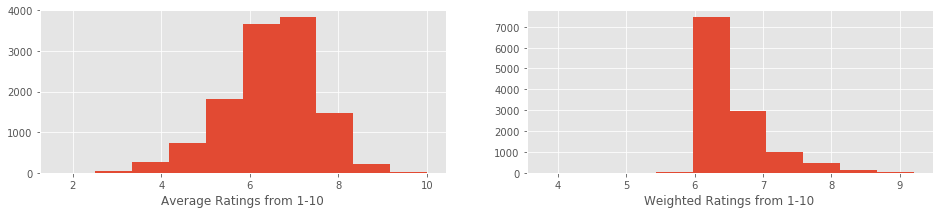

In [70]:
fig, ax = plt.subplots(1,2, figsize=(16,3))
ax[0].hist(anime_full['avg_rating'])
ax[0].set_xlabel('Average Ratings from 1-10')
ax[1].hist(anime_full['weighted_rating'])
ax[1].set_xlabel('Weighted Ratings from 1-10')
# plt.savefig('images/ratings_dist.png', dpi=300)

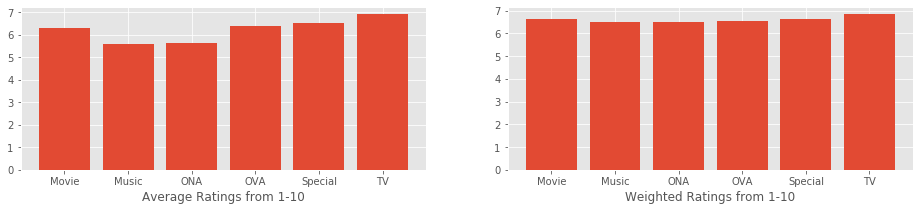

In [71]:
grouped = anime_full.groupby('type').mean()['avg_rating']
grouped2 = anime_full.groupby('type').mean()['weighted_rating']

fig, ax = plt.subplots(1,2, figsize=(16,3))
ax[0].bar(grouped.index, height=grouped.values)
ax[0].set_xlabel('Average Ratings from 1-10')
ax[1].bar(grouped2.index, height=grouped2.values)
ax[1].set_xlabel('Weighted Ratings from 1-10')
# plt.savefig('images/ratings_per_type.png', dpi=300)

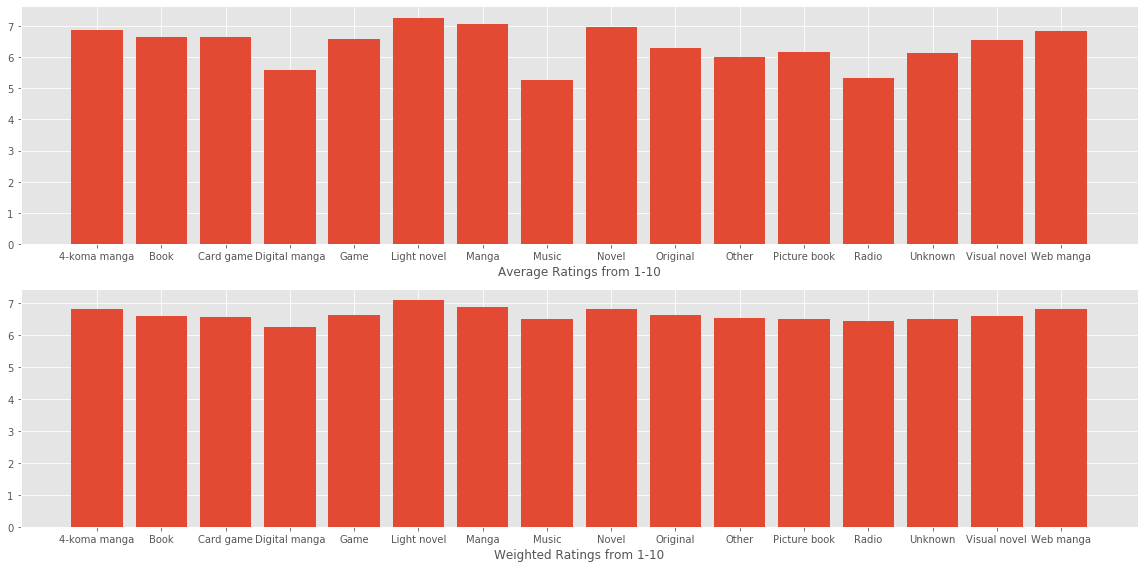

In [78]:
grouped = anime_full.groupby('source').mean()['avg_rating']
grouped2 = anime_full.groupby('source').mean()['weighted_rating']

fig, ax = plt.subplots(2,1, figsize=(16,8))
ax[0].bar(grouped.index, height=grouped.values)
ax[0].set_xlabel('Average Ratings from 1-10')
ax[1].bar(grouped2.index, height=grouped2.values)
ax[1].set_xlabel('Weighted Ratings from 1-10')
plt.tight_layout()
# plt.savefig('images/ratings_per_source.png', dpi=300)

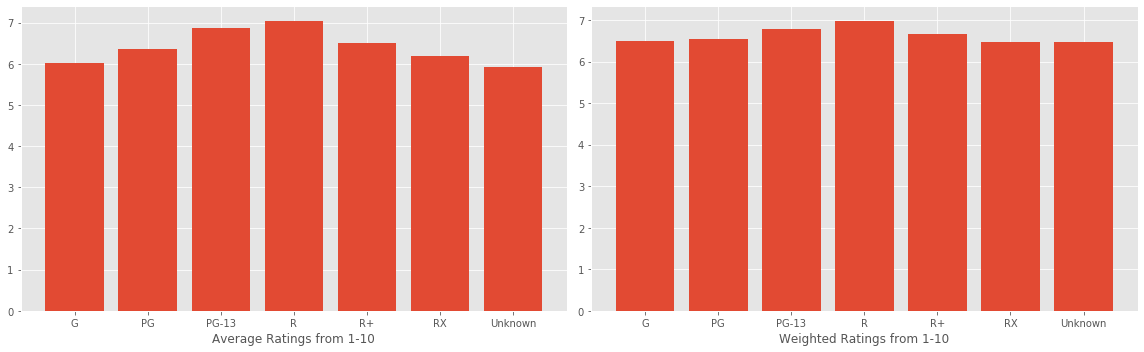

In [82]:
grouped = anime_full.groupby('rating_type').mean()['avg_rating']
grouped2 = anime_full.groupby('rating_type').mean()['weighted_rating']

fig, ax = plt.subplots(1,2, figsize=(16,5))
ax[0].bar(grouped.index, height=grouped.values)
ax[0].set_xlabel('Average Ratings from 1-10')
ax[1].bar(grouped2.index, height=grouped2.values)
ax[1].set_xlabel('Weighted Ratings from 1-10')
plt.tight_layout()
plt.savefig('images/ratings_per_rating_type.png', dpi=300)

In [4]:
def explode_text(anime_full):
    exp_anime = anime_full.copy()
    #Fill all na's
    exp_anime['studio'] = exp_anime['studio'].fillna('Unknown')
    exp_anime['producer'] = exp_anime['producer'].fillna('Unknown')
    #explode all columns
    exp_anime = exp_anime.explode('genre')
    exp_anime['genre'] = exp_anime['genre'].transform(lambda x: x[1:] if x[0]==" " else x)
    exp_anime['studio'] = exp_anime['studio'].transform(lambda x: x.split(','))
    exp_anime = exp_anime.explode('studio')
    exp_anime['producer'] = exp_anime['producer'].transform(lambda x: x.split(','))
    exp_anime = exp_anime.explode('producer')
    return exp_anime

In [5]:
exp_anime = explode_text(anime_full)
exp_anime

,anime_id,name,episodes,avg_rating,members,title_english,image_url,type,source,status,...,rank,popularity,favorites,producer,studio,genre,opening_theme,ending_theme,num_ratings,weighted_rating
0,32281,Kimi No Na Wa.,1,9.37,200630,Your Name.,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,...,2.0,33.0,34912.0,Kadokawa Shoten,CoMix Wave Films,Supernatural,"['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0,9.169377
0,32281,Kimi No Na Wa.,1,9.37,200630,Your Name.,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,...,2.0,33.0,34912.0,Toho,CoMix Wave Films,Supernatural,"['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0,9.169377
0,32281,Kimi No Na Wa.,1,9.37,200630,Your Name.,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,...,2.0,33.0,34912.0,Sound Team Don Juan,CoMix Wave Films,Supernatural,"['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0,9.169377
0,32281,Kimi No Na Wa.,1,9.37,200630,Your Name.,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,...,2.0,33.0,34912.0,Lawson HMV Entertainment,CoMix Wave Films,Supernatural,"['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0,9.169377
0,32281,Kimi No Na Wa.,1,9.37,200630,Your Name.,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,...,2.0,33.0,34912.0,Amuse,CoMix Wave Films,Supernatural,"['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0,9.169377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami Tai Mecha-Minami,1,4.15,211,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,...,NaN,10297.0,0.0,Unknown,Unknown,Hentai,[],[],2.0,6.441523
12290,5543,Under World,1,4.28,183,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,...,NaN,10456.0,0.0,Unknown,Unknown,Hentai,[],[],2.0,6.447341
12291,5621,Violence Gekiga David No Hoshi,4,4.88,219,Beautiful Girl Hunter,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,...,NaN,10164.0,2.0,Unknown,Unknown,Hentai,[],[],1.0,6.450864
12292,6133,Violence Gekiga Shin David No Hoshi: Inma Dens...,1,4.98,175,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,...,NaN,10510.0,0.0,Unknown,Unknown,Hentai,[],[],1.0,6.456597


In [13]:
exp_anime['studio'] = exp_anime['studio'].transform(lambda x: x[1:] if x[0]==' ' else x)
exp_anime['producer'] = exp_anime['producer'].transform(lambda x: x[1:] if x[0]==' ' else x)

In [60]:
exp_anime = anime_full.copy()
# exp_anime['genre'] = exp_anime['genre'].transform(lambda x: x.split(','))
exp_anime = exp_anime.explode('genre')
exp_anime['genre'] = exp_anime['genre'].transform(lambda x: x[1:] if x[0]==" " else x)
exp_anime

,anime_id,name,episodes,avg_rating,members,title_english,image_url,type,source,status,aired,duration,rating_type,rank,popularity,favorites,producer,studio,genre,opening_theme,ending_theme,num_ratings,weighted_rating
0,32281,Kimi No Na Wa.,1,9.37,200630,Your Name.,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,"{'from': '2016-08-26', 'to': '2016-08-26'}",1 hr. 46 min.,PG-13,2.0,33.0,34912.0,"Kadokawa Shoten, Toho, Sound Team Don Juan, La...",CoMix Wave Films,Supernatural,"['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0,9.169377
0,32281,Kimi No Na Wa.,1,9.37,200630,Your Name.,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,"{'from': '2016-08-26', 'to': '2016-08-26'}",1 hr. 46 min.,PG-13,2.0,33.0,34912.0,"Kadokawa Shoten, Toho, Sound Team Don Juan, La...",CoMix Wave Films,Drama,"['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0,9.169377
0,32281,Kimi No Na Wa.,1,9.37,200630,Your Name.,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,"{'from': '2016-08-26', 'to': '2016-08-26'}",1 hr. 46 min.,PG-13,2.0,33.0,34912.0,"Kadokawa Shoten, Toho, Sound Team Don Juan, La...",CoMix Wave Films,Romance,"['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0,9.169377
0,32281,Kimi No Na Wa.,1,9.37,200630,Your Name.,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,"{'from': '2016-08-26', 'to': '2016-08-26'}",1 hr. 46 min.,PG-13,2.0,33.0,34912.0,"Kadokawa Shoten, Toho, Sound Team Don Juan, La...",CoMix Wave Films,School,"['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0,9.169377
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,Fullmetal Alchemist: Brotherhood,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2009-04-05', 'to': '2010-07-04'}",24 min. per ep.,R,1.0,4.0,106895.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Action,"['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",21494.0,9.208548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami Tai Mecha-Minami,1,4.15,211,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2001-10-26', 'to': '2001-10-26'}",30 min.,RX,NaN,10297.0,0.0,NaN,NaN,Hentai,[],[],2.0,6.441523
12290,5543,Under World,1,4.28,183,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2000-11-18', 'to': '2000-11-18'}",1 hr. 4 min.,RX,NaN,10456.0,0.0,NaN,NaN,Hentai,[],[],2.0,6.447341
12291,5621,Violence Gekiga David No Hoshi,4,4.88,219,Beautiful Girl Hunter,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1989-12-05', 'to': '1990-06-05'}",45 min. per ep.,RX,NaN,10164.0,2.0,NaN,NaN,Hentai,[],[],1.0,6.450864
12292,6133,Violence Gekiga Shin David No Hoshi: Inma Dens...,1,4.98,175,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1991-03-08', 'to': '1991-03-08'}",45 min.,RX,NaN,10510.0,0.0,NaN,NaN,Hentai,[],[],1.0,6.456597


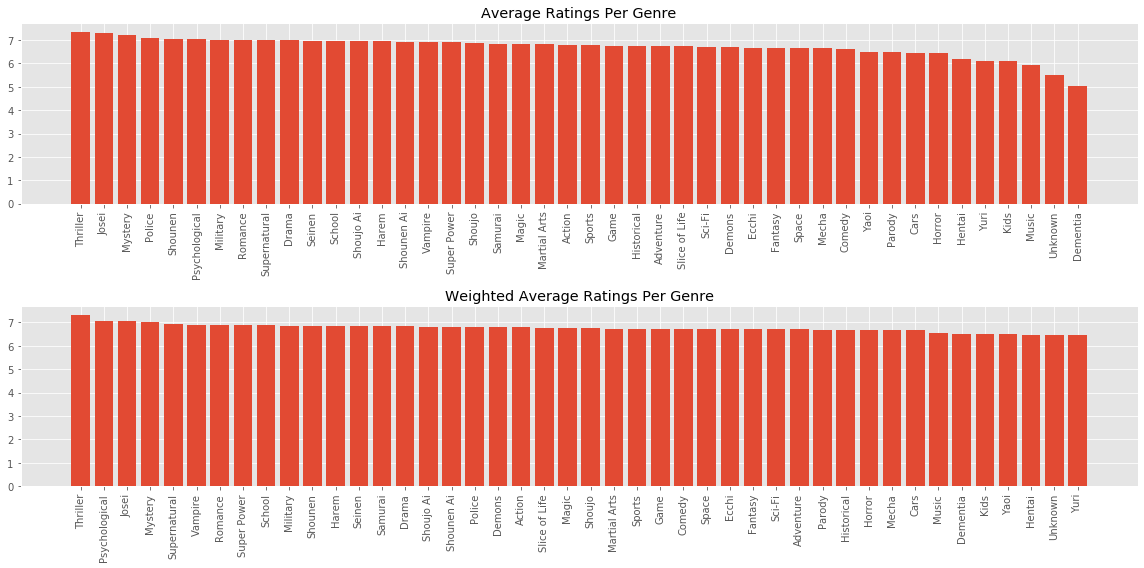

In [61]:
viz = exp_anime.groupby('genre').mean()['avg_rating'].sort_values(ascending=False)
viz2 = exp_anime.groupby('genre').mean()['weighted_rating'].sort_values(ascending=False)

fig, ax = plt.subplots(2,1, figsize=(16,8))
ax[0].bar(x=viz.index, height=viz.values)
ax[0].set_xticklabels(labels=viz.index, rotation=90)
ax[0].set_title('Average Ratings Per Genre')
ax[1].bar(x=viz2.index, height=viz2.values)
ax[1].set_xticklabels(labels=viz2.index, rotation=90)
ax[1].set_title('Weighted Average Ratings Per Genre')

plt.tight_layout()
plt.savefig('images/ratings_per_genre.png', dpi=300)
plt.show()

In [ ]:
# exp_anime_studio = exp_anime.copy()
# exp_anime_studio['studio'] = exp_anime_studio['studio'].fillna('Unknown')
# exp_anime_studio['studio'] = exp_anime_studio['studio'].transform(lambda x: x.split(','))
# exp_anime_studio = exp_anime_studio.explode('studio')
# exp_anime_studio

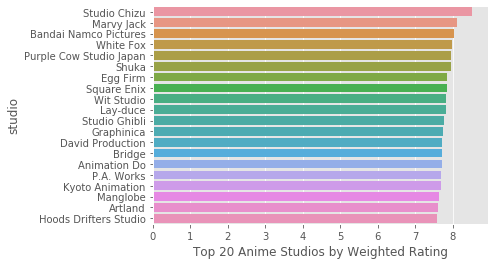

In [15]:
viz = exp_anime.groupby('studio').mean()[['avg_rating','weighted_rating']].sort_values(by='weighted_rating',ascending=False)[:20]

sns.barplot(x='weighted_rating', y=viz.index, data=viz)
plt.xlabel('Top 20 Anime Studios by Weighted Rating')
plt.savefig('images/ratings_per_studio.png', dpi=300)

In [16]:
viz.index[:20]

Index(['Studio Chizu', 'Marvy Jack', 'Bandai Namco Pictures', 'White Fox',
       'Purple Cow Studio Japan', 'Shuka', 'Egg Firm', 'Square Enix',
       'Wit Studio', 'Lay-duce', 'Studio Ghibli', 'Graphinica',
       'David Production', 'Bridge', 'Animation Do', 'P.A. Works',
       'Kyoto Animation', 'Manglobe', 'Artland', 'Hoods Drifters Studio'],
      dtype='object', name='studio')

In [101]:
exp_anime_producer = exp_anime.copy()
exp_anime_producer['producer'] = exp_anime_producer['producer'].fillna('Unknown')
exp_anime_producer['producer'] = exp_anime_producer['producer'].transform(lambda x: x.split(','))
exp_anime_producer = exp_anime_producer.explode('producer')

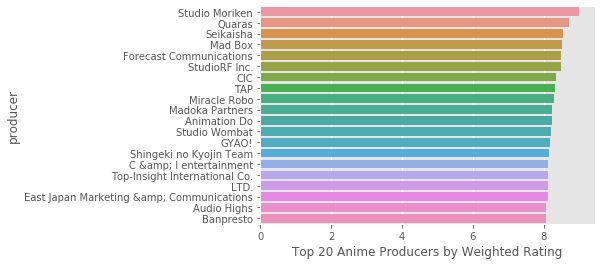

In [17]:
viz2 = exp_anime.groupby('producer').mean()[['avg_rating','weighted_rating']].sort_values(by='weighted_rating',ascending=False).head(20)
sns.barplot(x='weighted_rating', y=viz2.index, data=viz2)
plt.xlabel('Top 20 Anime Producers by Weighted Rating')
plt.savefig('images/ratings_per_producers.png', dpi=300)

In [18]:
viz2.index[:20]

Index(['Studio Moriken', 'Quaras', 'Seikaisha', 'Mad Box',
       'Forecast Communications', 'StudioRF Inc.', 'CIC', 'TAP',
       'Miracle Robo', 'Madoka Partners', 'Animation Do', 'Studio Wombat',
       'GYAO!', 'Shingeki no Kyojin Team', 'C &amp; I entertainment',
       'Top-Insight International Co.', 'LTD.',
       'East Japan Marketing &amp; Communications', 'Audio Highs',
       'Banpresto'],
      dtype='object', name='producer')

## Combine user_meta & rating_df

In [114]:
users_meta

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,NaN,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,NaN,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,NaN,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,NaN,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,shuzzable,2347781,36,72,16,2,25,35.48,NaN,NaN,NaN,NaN,2013-03-25,2015-09-09 21:54:00,9.06,7.0,2154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302670,ScruffyPuffy,3119025,0,27,0,0,0,7.92,NaN,NaN,NaN,NaN,2013-09-06,2014-10-10 09:04:00,0.00,0.0,477.0
302671,Torasori,3975907,22,239,0,4,176,86.88,Male,"Latvia, Riga",1998-11-18,NaN,2014-07-30,2018-05-24 21:34:46,8.98,47.0,5313.0
302672,onpc,1268417,5,169,2,5,24,38.36,Male,NaN,NaN,NaN,2012-04-23,2016-12-28 14:35:00,7.72,0.0,2280.0
302673,HMicca,1289601,11,73,2,2,16,119.97,Female,"Birmingham, England",1995-08-12,NaN,2012-05-05,2012-11-15 08:10:00,8.89,11.0,7049.0


In [36]:
rating_df

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [2]:
ratings_user = rating_df.merge(right=users_meta, how='left', on='user_id')
ratings_user

,user_id,anime_id,rating,username,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,1,8074,10,Xinil,4.0,230.0,8.0,89.0,60.0,133.32,Male,California,1985-03-04,NaN,2004-11-05,2018-05-14 18:02:55,7.37,58.0,7920.0
1,1,11617,10,Xinil,4.0,230.0,8.0,89.0,60.0,133.32,Male,California,1985-03-04,NaN,2004-11-05,2018-05-14 18:02:55,7.37,58.0,7920.0
2,1,11757,10,Xinil,4.0,230.0,8.0,89.0,60.0,133.32,Male,California,1985-03-04,NaN,2004-11-05,2018-05-14 18:02:55,7.37,58.0,7920.0
3,1,15451,10,Xinil,4.0,230.0,8.0,89.0,60.0,133.32,Male,California,1985-03-04,NaN,2004-11-05,2018-05-14 18:02:55,7.37,58.0,7920.0
4,2,11771,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6337236,73515,16512,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6337237,73515,17187,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6337238,73515,22145,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6337239,73516,790,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
ratings_user[ratings_user['username'].isnull()]
#4M out of 6M ratings will have no user profiles

,user_id,anime_id,rating,username,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
4,2,11771,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,5,6,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,5,15,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,5,17,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,5,18,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6337236,73515,16512,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6337237,73515,17187,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6337238,73515,22145,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6337239,73516,790,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
ratings_user[~ratings_user['username'].isnull()]['anime_id'].nunique()

8939

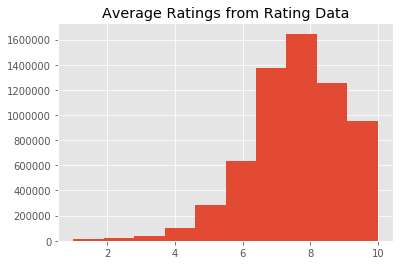

In [26]:
rating_df['rating'].hist()
plt.title('Average Ratings from Rating Data')
plt.savefig('images/avg_user_rating.png', dpi=300)

In [21]:
ratings_user[ratings_user.isnull()]

,user_id,anime_id,rating,username,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6337236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6337237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6337238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6337239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
rating_df['user_id'].nunique()

69600

In [36]:
rating_df['anime_id'].nunique()

9927

In [32]:
grouped = rating_df.groupby('anime_id').count().sort_values('rating',ascending=False)

In [35]:
grouped[grouped['rating']<5]

,user_id,rating
anime_id,,
9645,4,4
27653,4,4
10751,4,4
24743,4,4
4709,4,4
...,...,...
30403,1,1
30404,1,1
30405,1,1
